<a href="https://colab.research.google.com/github/arka420/Book-recommended-System-Unsupervised-Project-/blob/main/Arkadyuti_Book_recommended_system_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Book Recommendation System**



<html>
    <img src="https://th.bing.com/th/id/R.787b8c1151951ab025c9adbd3fc5e05e?rik=1FYjfosgMeRZpg&riu=http%3a%2f%2fyesofcorsa.com%2fwp-content%2fuploads%2f2017%2f05%2fBookshelves-Wallpaper.jpg&ehk=Yj%2fvhKenZjjh%2be5uFiYBSshXEKT7%2bOAGDrlaGFN6FeI%3d&risl=&pid=ImgRaw&r=0" width="1000" height="400">
</html>

##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual(Arkadyuti Dhara)


# **GitHub Link -**


[Github-link](https://github.com/arka420/Book-recommended-System-Unsupervised-Project-.git)

# **Project Summary -**

This project aimed to develop a book recommendation system using unsupervised learning techniques on the Book Crossing dataset. It involved thorough data exploration, cleaning, and visualization to understand relationships between variables. Recommender systems, including popularity-based filtering, correlation-based recommendations, and collaborative filtering (both Item-User and k-nearest neighbors), were implemented. The project showcased the potential of these techniques in generating personalized book recommendations for users based on a dataset comprising books, users, and ratings. Data wrangling and visualization played crucial roles in enhancing the system's effectiveness.

#**Problem Statement**

This project focuses on developing a book recommendation system in response to the growing importance of recommender systems in online platforms. These systems, widely used by services like YouTube, Amazon, and Netflix, offer personalized suggestions, enhancing user experiences in various domains. The primary goal is to create a book recommendation system using K-NN (K-Nearest Neighbors), Cosine Distance, and Cosine Similarity. This system aims to efficiently recommend books based on user ratings and interests, providing personalized suggestions aligned with individual preferences. The project recognizes the pivotal role recommender systems play in revenue generation and business differentiation, emphasizing their significance in today's digital landscape.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















**In a book recommendation system project with datasets containing information on books, ratings, and users.**

**Books Dataset:**

1. **ISBN (International Standard Book Number)**: A unique identifier for each book.
2. **Book-Title**: The title of the book.
3. **Book-Author**: The author of the book. In some datasets, multiple authors may be listed.
4. **Year-Of-Publication**: The year when the book was published.
5. **Publisher**: The publishing company responsible for the book.
6. **Image-URL-S, Image-URL-M, Image-URL-L**: URLs pointing to different sizes of cover images for the book.


**Ratings Dataset:**

1. **User-ID**: A unique identifier for each user, which may be anonymized.
2. **ISBN**: The ISBN of the book that the user has rated.
3. **Book-Rating**: The rating assigned by the user to the book. Ratings are typically on a scale from 1 to 10, with higher values indicating higher appreciation. Some ratings may be implicit and denoted as 0.

**Users Dataset:**

1. **User-ID**: A unique identifier for each user, corresponding to the User-ID in the ratings dataset.
2. **Location**: The location or geographical information of the user, if available.
3. **Age**: The age of the user, if available. In some datasets, age may be represented with a range or as NULL for missing data.


In a book recommendation system project, these datasets and their columns are essential for building and evaluating recommendation algorithms. The goal is to use user ratings and other information to provide personalized book recommendations to users based on their preferences and behavior.

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import operator
from collections import Counter
from scipy.sparse import csr_matrix
from pandas.api.types import is_numeric_dtype
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
# This is to supress the warning messages (if any) generated in our code
import warnings
warnings.filterwarnings("ignore")
# Mute the sklearn and IPython warnings
import warnings
warnings.filterwarnings('ignore', module='sklearn')
warnings.filterwarnings('ignore', module='IPython')

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 2000)
pd.set_option('display.expand_frame_repr', False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Dataset Loading

In [ ]:
# Load Dataset
books = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Book recommended system project/Dataset/Books.csv')

In [ ]:
users = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Book recommended system project/Dataset/Users.csv')

In [ ]:
ratings = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Book recommended system project/Dataset/Ratings.csv')

In [ ]:
# Dataset First Look
books.head()

**books dataset**<br>

1.***ISBN***: ISBN stands for International Standard Book Number. It is a unique numerical identifier used to identify books and other monographic publications. Each ISBN consists of a series of digits that uniquely identify a specific edition or version of a book.<br>
The purpose of an ISBN is to provide a standardized method for identifying and cataloging books. It helps publishers, booksellers, libraries, and other organizations to efficiently manage and track books. By using an ISBN, a book can be easily located, ordered, and sold internationally<br>

2.***Book-Title***: Title of the book

3.***Book-Author***: Author of the book

4.***Year-Of-Publication***:Year-Of-Publication

5.***Publisher***: Publisher is the organization or company responsible for producing and distributing the book to the public. Publishers handle various aspects of the book's publication process, including acquiring manuscripts, editing, designing, printing, marketing, and distributing the book.

6.***Image-URL-S***: short URL of the image

7.***Image-URL-M***:medium URL of the image

8.***Image-URL-L***:long URL of the image

In [ ]:
ratings.head()

***ratings dataset***

1.**User-ID**: User id of the reader/customer who reviews the book<br>
2.**ISBN**: Unique idenifier for book whos review has been made<br>
3.**Book-Rating**: Rating of the particular book


***users dataset***

In [ ]:
users.head()

1.**User-ID**:User id of the reader/customer who reviews the book<br>
2.**Location**:Location<br>
3.**Age**: age<br>

In [ ]:
# Print information of all datasets
print("Books Info:")
print(books.info(), end="\n\n")

print("Ratings Info:")
print(ratings.info(), end="\n\n")

print("Users Info:")
print(users.info())


In [ ]:
class DatasetAnalyzer:
    def __init__(self, data):
        self.data = data

    def null_percentage(self):
        null_percentages = (self.data.isnull().mean() * 100).round(2)
        return null_percentages

    def sum_duplicates(self):
        duplicate_sum = self.data.duplicated().sum()
        return duplicate_sum

    def get_shape(self):
        rows, columns = self.data.shape
        return rows, columns



In [ ]:
analyzer = DatasetAnalyzer(books)

# Calculate null value percentages
null_percentages = analyzer.null_percentage()
print("Null Value Percentages:")
print(null_percentages)

# Sum of duplicate values
duplicate_sum = analyzer.sum_duplicates()
print("\nSum of Duplicate Values:", duplicate_sum)

# Shape of the dataset
rows, columns = analyzer.get_shape()
print("\nNumber of Rows:", rows)
print("Number of Columns:", columns)

In [ ]:
analyzer = DatasetAnalyzer(users)

# Calculate null value percentages
null_percentages = analyzer.null_percentage()
print("Null Value Percentages:")
print(null_percentages)

# Sum of duplicate values
duplicate_sum = analyzer.sum_duplicates()
print("\nSum of Duplicate Values:", duplicate_sum)

# Shape of the dataset
rows, columns = analyzer.get_shape()
print("\nNumber of Rows:", rows)
print("Number of Columns:", columns)

In [ ]:
analyzer = DatasetAnalyzer(ratings)

# Calculate null value percentages
null_percentages = analyzer.null_percentage()
print("Null Value Percentages:")
print(null_percentages)

# Sum of duplicate values
duplicate_sum = analyzer.sum_duplicates()
print("\nSum of Duplicate Values:", duplicate_sum)

# Shape of the dataset
rows, columns = analyzer.get_shape()
print("\nNumber of Rows:", rows)
print("Number of Columns:", columns)

Based on the information provided about the three dataframes (Books, Ratings, and Users),  the information provided about the data in a DataFrames, there are a few conclusions and observations that can be made:

Books
1. Dataset Size:
   - The dataset contains a total of 271,360 entries (rows).


3. Data Types:
   - All columns in the DataFrame are of data type "object."

4. Missing Data:
   - There appears to be some missing data in the "author" and "publisher" columns, with one missing value in each of these columns.

5. Memory Usage:
   - The DataFrame consumes 12.4+ MB of memory



Ratings

1. Data Size:
 -  The dataset is relatively large, containing 1,149,780 entries. This indicates that it may be suitable for various data analysis tasks.

2. Data Types:

 -  The "user_id" and "rating" columns are of integer type (int64), while the "ISBN" column is of object type (string or categorical data). The data types suggest that you have numeric user identifiers and ratings, as well as alphanumeric ISBN values.

3. Non-null Count:

 - All three columns have non-null values for all entries. This means there are no missing values in the dataset, which is a positive aspect for analysis.


Usera

1. **Data Overview**:
   - The DataFrame contains a total of 278,858 entries.
   - There are three columns: 'user_id', 'location', and 'age'.
   - 'user_id' and 'location' have no missing values, but 'age' has missing values in 110,762 entries.


4. **Handling Missing Age Data**:
   - we should  handle the missing age data. we could impute missing values using techniques like mean, median, or machine learning models. Understanding the distribution of missing values can help in deciding which imputation method is appropriate.

5. **Data Types**:
   - the data types of each column to ensure they are appropriate. 'user_id' and 'location' are of type int64 and object, respectively. Check if 'user_id' should be treated as a unique identifier or if it contains any meaningful information. You may want to convert 'age' to an integer if it doesn't require decimal precision.

6. **Memory Usage**:
   - The DataFrame consumes 6.4+ MB of memory.








In [ ]:
# Visualizing the missing values
# Missing values (books)
plt.figure(figsize=(20,4))
sns.heatmap((books.isna().sum()).to_frame(name='').T,cmap='GnBu', annot=True,
             fmt='0.0f').set_title('Count missing values (books)', fontsize=18)
plt.show()

In [ ]:
# Visualizing the missing values
# Missing values (ratings)
plt.figure(figsize=(20,4))
sns.heatmap((ratings.isna().sum()).to_frame(name='').T,cmap='GnBu', annot=True,
             fmt='0.0f').set_title('Count missing values (ratings)', fontsize=18)
plt.show()

In [ ]:
# Visualizing the missing values
# Missing values (users)
plt.figure(figsize=(20,4))
sns.heatmap((users.isna().sum()).to_frame(name='').T,cmap='GnBu', annot=True,
             fmt='0.0f').set_title('Count missing values (users)', fontsize=18)
plt.show()

## ***2. Understanding Your Variables***

In [ ]:
dataframes = [(books, 'Books'), (ratings, 'Ratings'), (users, 'Users')]
for df, name in dataframes:
    print(f"Unique values in {name} dataset:")
    unique_values = df.apply(lambda col: col.unique())
    print('\n')
    print(unique_values)

In [ ]:
def describe_(dataset):
  return dataset.describe(include='all')

In [ ]:
describe_(books)

In [ ]:
describe_(ratings)

In [ ]:
describe_(users)

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Renamed the column names for the convenience
books.rename(columns={'Book-Title':'title','Book-Author':'author','Year-Of-Publication':'year','Publisher':'publisher'},inplace=True)
users.rename(columns={'User-ID':'user_id','Location':'location','Age':'age'},inplace=True)
ratings.rename(columns={'User-ID':'user_id','Book-Rating':'rating'},inplace=True)


### Books

In [ ]:
#dropping last three columns containing image URLs which will not be required for analysis
books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'],axis=1,inplace=True)

In [ ]:
unique_titles = books['title'].unique()
unique_authors = books['author'].unique()
unique_years = books['year'].unique()
unique_publishers = books['publisher'].unique()


print("Unique Titles:")
print(unique_titles)

print("\nUnique Authors:")
print(unique_authors)

print("\nUnique Years:")
print(unique_years)

print("\nUnique Publishers:")
print(unique_publishers)


Here we can see there is a mistake in year column.String can't be a year so we need to check what's wrong in it and finally we neeed to change its data type to int

In [ ]:
# Find rows where 'DK Publishing Inc' is in the 'year' column
books[books['year'] == 'DK Publishing Inc']

In [ ]:
books.loc[209538].values

In [ ]:
books.loc[221678].values

In [ ]:
# Specified the ISBN of the book that I want to correct
isbn_to_correct = '0789466953'

# Define the corrected values
corrected_title = 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'
corrected_author = 'James Buckley'
corrected_publisher='DK Publishing Inc'
corrected_year=2000

# Correct the values
books.loc[books['ISBN'] == isbn_to_correct, 'title'] = corrected_title
books.loc[books['ISBN'] == isbn_to_correct, 'author'] = corrected_author
books.loc[books['ISBN'] == isbn_to_correct, 'year'] = corrected_year
books.loc[books['ISBN'] == isbn_to_correct, 'publisher'] = corrected_publisher

In [ ]:
# Specified the ISBN of the book that I want to correct
isbn_to_correct = '078946697X'

# Define the corrected values
corrected_title = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'
corrected_author = 'Michael Teitelbaum'
corrected_publisher='DK Publishing Inc'
corrected_year=2000

# Correct the values
books.loc[books['ISBN'] == isbn_to_correct, 'title'] = corrected_title
books.loc[books['ISBN'] == isbn_to_correct, 'author'] = corrected_author
books.loc[books['ISBN'] == isbn_to_correct, 'year'] = corrected_year
books.loc[books['ISBN'] == isbn_to_correct, 'publisher'] = corrected_publisher

In [ ]:
#rechecking
books.loc[(books.ISBN == '0789466953') | (books.ISBN == '078946697X'),:]
#corrections done

In [ ]:
books[books['year'] == 'Gallimard']

In [ ]:
books.loc[220731].values

In [ ]:
# Specified the ISBN of the book that I want to correct
isbn_to_correct = '2070426769'

# Define the corrected values
corrected_title = "Peuple du ciel, suivi de \'Les Bergers\\"
corrected_author = 'Jean-Marie Gustave Le ClÃ?Â©zio'
corrected_publisher='Gallimard'
corrected_year=2003

# Correct the values
books.loc[books['ISBN'] == isbn_to_correct, 'title'] = corrected_title
books.loc[books['ISBN'] == isbn_to_correct, 'author'] = corrected_author
books.loc[books['ISBN'] == isbn_to_correct, 'year'] = corrected_year
books.loc[books['ISBN'] == isbn_to_correct, 'publisher'] = corrected_publisher

In [ ]:
#rechecking
books.loc[(books.ISBN == '078946697X'),:]
#corrections done

In [ ]:
class BookDataProcessor:
    def __init__(self, books):
        self.books = books

    def clean_and_transform_year(self):
        # Step 1: Filter out invalid or non-year values
        valid_years = self.books['year'].astype(str).str.isnumeric()
        self.books = self.books[valid_years]

        # Step 2: Convert the column data to integers
        self.books['year'] = self.books['year'].astype(int)

        # Step 3: Create a new datetime column from the integers representing years
        self.books['year'] = pd.to_datetime(self.books['year'], format='%Y', errors='coerce')

        # Step 4: Create a new column with only the year part as integers
        self.books['year'] = self.books['year'].dt.year

        return self.books



# Create an instance of the BookDataProcessor
processor = BookDataProcessor(books)

# Clean and transform the 'year' column
books = processor.clean_and_transform_year()


In [ ]:


# Remove rows with 'NA' (NaN) values in the 'year' column
books = books.dropna(subset=['year'])

# Remove rows with 'inf' values in the 'year' column
books = books[~np.isinf(books['year'])]


In [ ]:
books['year'] = books['year'].astype(int)

In [ ]:
#exploring 'publisher' column
books.loc[books.publisher.isnull(),:]

In [ ]:
isbn_to_correct = '193169656X'

# Define the corrected values
corrected_publisher = "Unknown"
# Correct the values
books.loc[books['ISBN'] == isbn_to_correct, 'publisher'] = corrected_publisher

In [ ]:
isbn_to_correct = '1931696993'

# Define the corrected values
corrected_publisher = "Unknown"
# Correct the values
books.loc[books['ISBN'] == isbn_to_correct, 'publisher'] = corrected_publisher

Replaced Nan publishers with the name 'Unknown'

In [ ]:
books.shape

### users

In [ ]:
unique_location = users['location'].unique()
unique_age = users['age'].unique()

print(unique_location)
print('\n')
print(unique_age)

In [ ]:
# Created function for getting another three columns(City,State,Country) from location column
def process_location_column(users):
    list_ = users.location.str.split(', ')
    city = []
    state = []
    country = []
    count_no_state = 0
    count_no_country = 0

    for i in range(len(list_)):
        if list_[i][0] == ' ' or list_[i][0] == '' or list_[i][0] == 'n/a' or list_[i][0] == ',':
            city.append('other')
        else:
            city.append(list_[i][0].lower())

        if len(list_[i]) < 2:
            state.append('other')
            country.append('other')
            count_no_state += 1
            count_no_country += 1
        else:
            if list_[i][1] == ' ' or list_[i][1] == '' or list_[i][1] == 'n/a' or list_[i][1] == ',':
                state.append('other')
                count_no_state += 1
            else:
                state.append(list_[i][1].lower())

            if len(list_[i]) < 3:
                country.append('other')
                count_no_country += 1
            else:
                if list_[i][2] == '' or list_[i][1] == ',' or list_[i][2] == ' ' or list_[i][2] == 'n/a':
                    country.append('other')
                    count_no_country += 1
                else:
                    country.append(list_[i][2].lower())

    users = users.drop('location', axis=1)

    temp = []
    for ent in city:
        c = ent.split('/')
        temp.append(c[0])

    df_city = pd.DataFrame(temp, columns=['City'])
    df_state = pd.DataFrame(state, columns=['State'])
    df_country = pd.DataFrame(country, columns=['Country'])

    users = pd.concat([users, df_city], axis=1)
    users = pd.concat([users, df_state], axis=1)
    users = pd.concat([users, df_country], axis=1)

    print("Count of entries with no country:", count_no_country)
    print("Count of entries with no state:", count_no_state)

    return users

In [ ]:
users = process_location_column(users)

In [ ]:
users.head()

In [ ]:
# Replaced most of the errors in the country column

In [ ]:
# List of original country names to be replaced
old_names = ['', '01776', '02458', '19104', '23232', '30064', '85021', '87510', 'alachua', 'america', 'austria', 'autralia', 'cananda', 'geermany', 'italia', 'united kindgonm', 'united sates', 'united staes', 'united state', 'united states', 'us']

# List of corresponding standardized country names
new_names = ['other', 'usa', 'usa', 'usa', 'usa', 'usa', 'usa', 'usa', 'usa', 'usa', 'australia', 'australia', 'canada', 'germany', 'italy', 'united kingdom', 'usa', 'usa', 'usa', 'usa', 'usa']

# Replace old country names with new ones
users['Country'].replace(old_names, new_names, inplace=True)


In [ ]:
# Define the age groups and their corresponding labels
age_groups = [0, 18, 25, 35, 50, 100]
age_labels = ['children', 'young-adult', 'adult', 'middle-age', 'senior']

# Create a new column 'age_group' based on the age values
users['age_group'] = pd.cut(users['age'], bins=age_groups, labels=age_labels, right=False)

# Display the resulting dataset
print(users)


### Rating

In [ ]:
unique_rating = ratings['rating'].unique()
print(unique_rating)

In [ ]:
## Drop duplicate rows
ratings.drop_duplicates(keep='last', inplace=True)
ratings.reset_index(drop=True, inplace=True)

In [ ]:
# lets count the different ratings
ratings.rating.value_counts().sort_index()

In [ ]:
# Took that rating of books which are in books dataset
new_ratings = ratings[ratings.ISBN.isin(books.ISBN)]
new_ratings.shape

In [ ]:
print("Shape of dataset before dropping",new_ratings.shape)
new_ratings = new_ratings[new_ratings['user_id'].isin(users['user_id'])]
print("shape of dataset after dropping",new_ratings.shape)

In [ ]:
#Hence separating implicit and explict ratings datasets
non_zero_ratings = new_ratings[new_ratings['rating'] != 0]
zero_ratings = new_ratings[new_ratings['rating'] == 0]

### What all manipulations have you done and insights you found?

**Dropped last three columns containing image URLs**

**Renamed all the columns for the 3 csv, changed the required datatypes for some columns.**

**Created a country, city and state column from the location column. From age column age_group column has been created**

**Replaced most of the errors in the country column.**

**Separated implicit and explict ratings datasets**


#### **Merging all datasets**

In [ ]:
#merging books and rating datasets using inner joint
dataset = pd.merge(books, non_zero_ratings, on='ISBN', how='inner')
#merging users with above merged datset
dataset = pd.merge(dataset, users, on='user_id', how='inner')
## #Print a concise summary of a DataFrame
dataset.info()

In [ ]:
# Printing top 5 rows
dataset.sample(5)

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [ ]:
# Chart - 1 visualization code
# Age Distribution
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
sns.histplot(users['age'], ax = axes[0],kde = True)
sns.boxplot(users['age'], ax = axes[1],orient='h',showmeans=True,color='pink')
fig.suptitle("Distribution plot of Age", fontsize = 15)
plt.show()

##### 1. Why did you pick the specific chart?
Histplot is useful for exploring the distribution of a single variable, while boxplot is handy for identifying potential outliers. Both types of plots serve different purposes but can be complementary in providing a comprehensive understanding of attribute.



##### 2. What is/are the insight(s) found from the chart?

From the distribution it appears that the age column is positively skewed (right skewed).

The boxplot shows that there are a lot of outliers present.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Analyzing age distribution through a histogram and detecting outliers with a boxplot can enhance a book recommendation system by providing insights for more accurate and personalized recommendations, although further analysis and data may be needed to fully achieve this business goal.

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(10,7))
sns.countplot(y='Country',data=users,order=pd.value_counts(users['Country']).iloc[:10].index)
plt.title('Count of users Country wise')
plt.show()

##### 1. Why did you pick the specific chart?

The countplot is employed to efficiently visualize and analyze the distribution of categorical data, offering valuable insights that can inform decision-making and strategy in various business contexts.


##### 2. What is/are the insight(s) found from the chart?

The most number of users are from USA followed by Canada. The remaining countries have comparatively less users who rate the books.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Analyzing user distribution by country can enhance the recommendation system by tailoring suggestions based on regional preferences, optimizing content relevance and potentially boosting business impact.

In [ ]:
# Chart - 3 visualization code

# Rating Distribution
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))

# With zero Rating Distribution
sns.histplot(ratings['rating'], ax=axes[0, 0], kde=True, color='gold')
sns.boxplot(ratings['rating'], ax=axes[0, 1], orient='h', showmeans=True, color='lightgreen')
axes[0, 0].set_title("With zero Rating Distribution")

# Non-Zero Rating Distribution
sns.histplot(non_zero_ratings['rating'], ax=axes[1, 0], kde=True, color='deeppink')
sns.boxplot(x=non_zero_ratings['rating'], ax=axes[1, 1], orient='h', showmeans=True, color='lightgreen')
axes[1, 0].set_title("Non-Zero Rating Distribution")

fig.suptitle("Distribution plot of Book Rating", fontsize=15)
plt.show()


##### 1. Why did you pick the specific chart?

Histplot is useful for exploring the distribution of a single variable, while boxplot is handy for identifying potential outliers. Both types of plots serve different purposes but can be complementary in providing a comprehensive understanding of attribute.


##### 2. What is/are the insight(s) found from the chart?

The implicit ratings from 0 to 10, histogram shows that the most count of ratings is 0.
The boxplots shows that the  mean is close to 3.

The non_zero ratings are from 1 to 10, the histogram shows that the most count of ratings is 8.

The boxplots shows that the median is 8 and mean is close to 7.5.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

To achieve a successful book recommendation system and drive positive business impact, additional analysis and data beyond basic insights are crucial for enhancing effectiveness and meeting business goals.

In [ ]:
# Chart - 4 visualization code
# Set up subplots
fig, axes = plt.subplots(nrows=2, figsize=(20, 12))

# Plot the distribution of years of publication for the entire dataset
sns.countplot(x='year', data=books, palette='viridis', ax=axes[0])
axes[0].set_title('Distribution of Years of Publication')
axes[0].set_xlabel('Year of Publication')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=90)

# Filter the data for years between 1950 and 2004
filtered_books = books[(books['year'] >= 1950) & (books['year'] <= 2004)]

# Plot the distribution of years of publication for the years 1950-2004
sns.countplot(x='year', data=filtered_books, palette='viridis', ax=axes[1])
axes[1].set_title('Distribution of Years of Publication (1950-2004)')
axes[1].set_xlabel('Year of Publication')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=90)


plt.tight_layout()

# Show the plots
plt.show()


##### 1. Why did you pick the specific chart?
Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.



##### 2. What is/are the insight(s) found from the chart?
The bar chart highlights a peak in book publications in 2002, with 1999 and 2001 closely following. Notably, there is a twofold increase in books published in 2002 compared to 1989.




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The bar chart reveals valuable insights into the distribution of books published over the years, providing a foundation for optimizing the recommendation system by considering publication years in the algorithm, thus enhancing its effectiveness and potential business impact.

In [ ]:
# Chart - 5 visualization code
# Create a new DataFrame with relevant columns
subset_df = dataset[['age_group', 'Country', 'user_id']]

# Group by age_group and Country, count the number of readers in each group
grouped_df = subset_df.groupby(['age_group', 'Country']).count().reset_index()

# Sort the DataFrame by user_id in descending order for each age group
sorted_df = grouped_df.sort_values(by=['age_group', 'user_id'], ascending=[True, False])

# Get the top 5 countries for each age group
top_countries_by_age_group = sorted_df.groupby('age_group').head(5)

# Create a bar chart with Plotly
fig = px.bar(top_countries_by_age_group, x='Country', y='user_id', color='age_group',
             labels={'user_id': 'Number of Readers', 'Country': 'Country'},
             title='Top 5 Countries with Most Readers in Each Age Group')

fig.update_layout(barmode='group', xaxis={'categoryorder': 'total ascending'})

fig.show()


##### 1. Why did you pick the specific chart?
Bar charts are effective for comparing the quantities or frequencies of different categories or groups. Each bar represents a category, and the length of the bar corresponds to the quantity it represents.



##### 2. What is/are the insight(s) found from the chart?

In the USA, the highest engagement with books, as indicated by ratings, is observed among adults in the middle age demographic. Following closely, a similar trend is noted in Canada.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By focusing on adult readers in the middle age demographic in both the USA and Canada, businesses can optimize their strategies to effectively cater to the preferences and interests of this engaged and influential audience.

In [ ]:
# Chart - 6 visualization code
# Group by author and count the number of books for each author
author_counts = books['author'].value_counts()

# Select the top 15 authors
top_authors = author_counts.head(15)

# Create a bar chart
plt.figure(figsize=(12, 5))
sns.barplot(x=top_authors.values, y=top_authors.index, palette='viridis')

plt.title('Top 15 Authors with the Highest Number of Books')
plt.xlabel('Number of Books')
plt.ylabel('Author')
plt.show()


##### 1. Why did you pick the specific chart?
Bar charts are effective for comparing the quantities or frequencies of different categories or groups. Each bar represents a category, and the length of the bar corresponds to the quantity it represents.



##### 2. What is/are the insight(s) found from the chart?
The top author is Agatha Christie as per the number of books followed by William Shakespeare.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Recognizing and strategically responding to the popularity of Agatha Christie and William Shakespeare can lead to increased sales, improved customer satisfaction, and a strengthened market position for businesses in the book industry.

In [ ]:
# Chart - 7 visualization code
# Calculating the total number of ratings for each book
book_ratings = dataset.groupby('title')['rating'].count().reset_index(name='total_ratings')

# Select the top 15 books based on total ratings
top_books = book_ratings.nlargest(15, 'total_ratings')

# Creating a bar chart using Plotly
fig = px.bar(top_books, x='total_ratings', y='title', orientation='h', text='total_ratings',
             labels={'total_ratings': 'Total Ratings', 'title': 'Book Title'},
             title='Top 15 Books with the Highest Number of Ratings',
             width=900, height=500,
             template='plotly_dark')  # You can choose a different template if you prefer



fig.show()


##### 1. Why did you pick the specific chart?

Bar charts are effective for comparing the quantities or frequencies of different categories or groups. Each bar represents a category, and the length of the bar corresponds to the quantity it represents.



##### 2. What is/are the insight(s) found from the chart?

The Lovely Bones: A Novel stands out with the highest number of ratings, totaling 707, while Wild Animus secures the second-highest position with 581 ratings.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


This information could be used to improve the recommendation system by taking into account the popularity of books when making recommendations.

In [ ]:
# Chart - 8 visualization code

# Count the number of publications for each publisher
publisher_counts = books['publisher'].value_counts().head(15)

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=publisher_counts.values, y=publisher_counts.index, palette='viridis')

# Set labels and title
plt.xlabel('Number of Publications')
plt.ylabel('Publisher')
plt.title('Top 15 Publishers with Highest Number of Publications')

plt.show()


##### 1. Why did you pick the specific chart?

Bar charts are effective for comparing the quantities or frequencies of different categories or groups. Each bar represents a category, and the length of the bar corresponds to the quantity it represents.


##### 2. What is/are the insight(s) found from the chart?

 Harlequin leads with the highest number of publications, followed by Silhouette in second place, and Pocket securing the third position among the top 15 publishers.




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Recognizing the dominance of Harlequin, Silhouette, and Pocket among top publishers enables a more effective book recommendation system, enhancing user satisfaction, driving engagement, and fostering potential business success in the book industry.

In [ ]:
# Chart - 9 visualization code
from wordcloud import WordCloud

# Create a function to generate word clouds
def generate_wordcloud(data_column, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data_column.dropna()))

    # Display the generated image:
    plt.figure(figsize=(15, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# Generate word clouds for City, State, and Author
generate_wordcloud(dataset['City'], 'Word Cloud for Cities')
generate_wordcloud(dataset['State'], 'Word Cloud for States')
generate_wordcloud(dataset['author'], 'Word Cloud for Authors')


##### 1. Why did you pick the specific chart?

Frequency Representation: The size of each word in a word cloud is proportional to its frequency in the dataset. This allows for an immediate understanding of which words occur most frequently.


##### 2. What is/are the insight(s) found from the chart?

Visualizing city-wise book rating users reveals a word cloud with prominent mentions of London, Toronto, Morrow, and New York. For states, California stands out as the most frequent, followed by Georgia. In the author category, Stephen King emerges as the highest-rated author, while Nora Roberts and John Grisham closely follow in terms of ratings.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the top authors based on the number of books and ratings, could potentially help in creating a positive business impact. This information could be used to improve the recommendation system by taking into account the popularity of authors when making recommendations. For example, books by popular authors such as Stephen King  and Nora Roberts could be recommended to users who have shown an interest in similar genres or themes.

In [ ]:
# Chart - 10 visualization code
import plotly.express as px
import pandas as pd

# Assuming 'dataset' is your DataFrame
age_group_counts = dataset['age_group'].value_counts().reset_index()

# Plotting the pie chart using Plotly
fig = px.pie(age_group_counts, names='index', values='age_group',
             title='Age Group Distribution',
             labels={'index': 'Age Group', 'age_group': 'Count'},
             hole=0.4, color_discrete_sequence=px.colors.qualitative.Pastel1)


fig.show()



##### 1. Why did you pick the specific chart?

Pie charts are simple to understand and visually intuitive. They are particularly effective when dealing with a small number of categories, making it easy for viewers to present the distribution of data at a glance.


##### 2. What is/are the insight(s) found from the chart?

The most prominent book ratings are attributed to the discerning preferences of middle-aged and adult readers.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Focusing on genres, authors, and themes that resonate with middle-aged and adult readers, ensuring more relevant and personalized book suggestions.

In [ ]:
# Chart - 11 visualization code
top_cities = dataset['City'].value_counts().head(15).index

# Filter the dataset for the top 15 cities
top_cities_data = dataset[dataset['City'].isin(top_cities)]

# Group by 'City' and 'author' and calculate the count
city_author_counts = top_cities_data.groupby(['City', 'author']).size().reset_index(name='Count')

# Find the most popular author in each city
popular_authors = city_author_counts.groupby('City').apply(lambda x: x.loc[x['Count'].idxmax()]).reset_index(drop=True)

# Plotting the bar chart using Plotly
fig = px.bar(popular_authors, x='City', y='Count', color='author',
             title='Most Popular Author in Top 15 Cities',
             labels={'City': 'City', 'Count': 'Number of Books'},
             color_discrete_sequence=px.colors.qualitative.Plotly)


fig.show()


##### 1. Why did you pick the specific chart?

Bar charts are effective for comparing the quantities or frequencies of different categories or groups. Each bar represents a category, and the length of the bar corresponds to the quantity it represents.


##### 2. What is/are the insight(s) found from the chart?
Barbara Cartland emerges as highly popular in Honolulu, while Stephen King dominates across various cities like Calgary, San Diego, Toronto, and others.




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Providing users with recommendations from highly popular authors in their respective cities can significantly enhance user engagement and satisfaction.

In [ ]:
# Chart - 12 visualization code

# Calculate the correlation matrix
corr = dataset.corr()

# Create a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(18, 6))

    # Create a custom diverging colormap
    cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    ax = sns.heatmap(corr, mask=mask, cmap="RdBu_r", vmin=-1, vmax=1, annot=True, fmt=".2f", linewidths=.5, cbar_kws={"shrink": 0.75})


    ax.set_title('Correlation Heatmap', fontsize=16)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)

plt.show()


##### 1. Why did you pick the specific chart?

Correlation heatmaps are used to quickly visualize and identify patterns in the relationships between multiple variables in a dataset, aiding in understanding the strength and direction of correlations.

Thus to know the correlation between all the variables along with the correlation coeficients, we have used correlation heatmap.


##### 2. What is/are the insight(s) found from the chart?
We can see corelation very low among the variables




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

## ***5. Feature Engineering & Data Pre-processing***

### Handling Missing Values and Outliers

In [ ]:
def missing_values_summary(data):
    total_missing = data.isnull().sum()
    percentage_missing = (data.isnull().mean() * 100).round(2)

    missing_summary = pd.DataFrame({
        'Total Missing Values': total_missing,
        'Percentage Missing': percentage_missing
    })

    return missing_summary


# Calculate missing values summary
missing_summary = missing_values_summary(users)
print("Missing Values Summary:")
print(missing_summary)


In [ ]:
# replace outlier with nan
users.loc[(users.age > 100) | (users.age < 5), 'age'] = np.nan

In [ ]:
# Calculate the mean age per location
location_mean_age = users.groupby('Country')['age'].transform('mean')

# Fill missing 'Age' values with the mean age of users from the same location
users['age'].fillna(location_mean_age, inplace=True)


In [ ]:
# Calculate missing values summary
missing_summary = missing_values_summary(users)
print("Missing Values Summary:")
print(missing_summary)


In [ ]:
# replacing the remaining missing values with mean
users['age'].fillna(users.age.mean(),inplace=True)

In [ ]:
# Calculate missing values summary
missing_summary = missing_values_summary(users)
print("Missing Values Summary:")
print(missing_summary)

In [ ]:
# dropping age_group column.
users.drop(['age_group'], axis=1, inplace=True)
dataset.drop(['age_group'],axis=1, inplace=True)

In [ ]:
# Calculate missing values summary
missing_summary = missing_values_summary(books)
print("Missing Values Summary:")
print(missing_summary)

In [ ]:
#exploring 'publisher' column
books.loc[books.author.isnull(),:]

In [ ]:
#Filling Nan value as other
books['author'].fillna('other',inplace=True)

## ***6. ML Model Implementation***
**Building Recommender Systems**

# **Algorithms Implemented:**
### **1 Popularity Based Recommendation :**
* **1.1 Popular in the Whole Collection**

We have sorted the dataset according to the total ratings each of the books have received in non-increasing order and then recommended top n books.

* **1.2 Popular at a Given Place**

The dataset was filtered according to a given place (city, state, or country) and then sorted according to total ratings they have received by the users in decreasing order of that place and recommended top n books.

* **1.3 Books By the Same Author**, Publisher of Given Book Name
For this model, we have sorted the books by rating for the same author and same publisher of the given book and recommended top n books.

Popular Books Yearly
This is the most basic model in which we have grouped all the books published in the same year and recommended the top-rated book yearly.

* **1.4  Recommendation using Average Weighted Rating**
We have calculated the weighted score using the below formula for all the books and recommended the books with the highest score.

score= t/(t+m)∗a + m/(m+t)∗c

where,
t represents the total number of ratings received by the book
m represents the minimum number of total ratings considered to be included
a represents the average rating of the book and,
c represents the mean rating of all the books.
###**2 User-Item Collaborative Filtering Recommendation**
Collaborative Filtering Recommendation System works by considering user ratings and finds cosine similarities in ratings by several users to recommend books. To implement this, we took only those books' data that have at least 50 ratings in all.

###**3 Correlation Based Recommendation**
For this model, we have created the correlation matrix considering only those books which have total ratings of more than 50. Then a user-book rating matrix is created. For the input book using the correlation matrix, top books are recommended.

###**4 Nearest Neighbour Based Recommendation**
To train the Nearest Neighbours model, we have created a compressed sparse row matrix taking ratings of each Book by each User individually. This matrix is used to train the Nearest Neighbours model and then to find n nearest neighbors using the cosine similarity metric.



###**5 Content Based Recommendation**
This system recommends books by calculating similarities in Book Titles. For this, TF-IDF feature vectors were created for unigrams and bigrams of Book-Titles; only those books' data has been considered which are having at least 80 ratings.



In [ ]:
bookName ="Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))"
number=5
# Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))

## **1. Popularity Based (Top In whole collection)**

In [ ]:
def popularity_based(dataframe, n):
    if n >= 1 and n <= len(dataframe):
        data = pd.DataFrame(dataframe.groupby('ISBN')['rating'].count()).sort_values('rating', ascending=False).head(n)
        result = pd.merge(data, books, on='ISBN', left_index = False)
        return result
    return "Invalid number of books entered!!"

In [ ]:
print("Top", number, "Popular books are: ")
popularity_based(dataset, number)

###**1.2. Popularity Based (Top In a given place)**





In [ ]:
# we want to recommend Popular books in a given place
def search_unique_places(dataframe, place):
    place = place.lower()

    if place in list(dataframe['City'].unique()):
        return dataframe[dataframe['City'] == place]
    elif place in list(dataframe['State'].unique()):
        return dataframe[dataframe['State'] == place]
    elif place in list(dataframe['Country'].unique()):
        return dataframe[dataframe['Country'] == place]
    else:
        return "Invalid Entry"

In [ ]:
place='India' # Just choosing a arbirary place
data = search_unique_places(dataset, place)

if isinstance(data, pd.DataFrame):
    data = popularity_based(data, number)

data

###**1.3 Books by same author, publisher of given book name**

In [ ]:
def printBook(k, n):
    z = k['title'].unique()
    for x in range(len(z)):
        print(z[x])
        if x >= n-1:
            break

In [ ]:
#Search based on same author,and publications of similar to user input book
def get_books(dataframe, name, n):
    print("\nBooks by same Author:\n")
    au = dataframe['author'].unique()

    data = dataset[dataset['title'] != name]

    if au[0] in list(data['author'].unique()):
        k2 = data[data['author'] == au[0]]
    k2 = k2.sort_values(by=['rating'])
    printBook(k2, n)

    print("\n\nBooks by same Publisher:\n")
    au = dataframe['publisher'].unique()

    if au[0] in list(data['publisher'].unique()):
        k2 = pd.DataFrame(data[data['publisher'] == au[0]])
    k2=k2.sort_values(by=['rating'])
    printBook(k2, n)

In [ ]:
if bookName in list(dataset['title'].unique()):
    d = dataset[dataset['title'] == bookName]
    get_books(d, bookName, number)
else:
    print("Invalid Book Name!!")

### **1.4 Average Weighted Ratings**

In [ ]:
# create a copy of df(average rating df)
avg_r_df = dataset.copy()
# calculate the average ratings
avg_r_df['avg_rating']=dataset.groupby('ISBN')['rating'].transform('mean')
# calculate the total ratings given every book
avg_r_df['total_ratings']=avg_r_df.groupby('ISBN')['rating'].transform('count')
# show avg_rating-dataframe
avg_r_df.head()

In [ ]:
# mean_ratin - Mean vote across the whole
mean_ratin = avg_r_df['avg_rating'].mean()

# Minimum number of votes required to be in the chart
# choose the top 90 percentile of the data
m = avg_r_df['total_ratings'].quantile(0.90)
print(f'C={mean_ratin} , m={m}')

# choosing total ratings in dataset greater than the 90th percentile
avg_r_90_percent = avg_r_df.loc[avg_r_df['total_ratings'] >= m]
# print the average-rating-dataframe 90th percentile
print(f'The data shape of average ratings df before slicinng based on 90 percentile {avg_r_df.shape} after slicing {avg_r_90_percent.shape}')

In [ ]:
# calc the weighted average of books
def weightedRating(x, m=m, C=mean_ratin):
    ''' returns weighted avarage of items, taken is x = dataframe,
        m = top 90 percentile data, c = mean-rating of the dataset'''
    #  v - number of votes
    v = x['total_ratings']
    # R - Average Rating
    R = x['avg_rating']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [ ]:
# calc score(weighted_average)
avg_r_90_percent['Score'] = avg_r_90_percent.apply(weightedRating, axis=1)
# sort based on the best ones(highest-weighted-avg)
avgwr_df = avg_r_90_percent.drop_duplicates('ISBN').sort_index()
#Sorting books based on score calculated above
avgwr_df = avgwr_df.sort_values('Score', ascending=False)
recomm_number =10
print("Book recommendation based of on Weighted Average ratings :-\n")
# choose the required nummber of books
avgwr_df[['title', 'total_ratings', 'avg_rating', 'Score']].reset_index(drop=True).head(recomm_number)

# avgwr_df.shape

## **2. Collaborative Filtering**

Selecting books with total ratings equals to or more than 50 (Because of availability of limited resources)
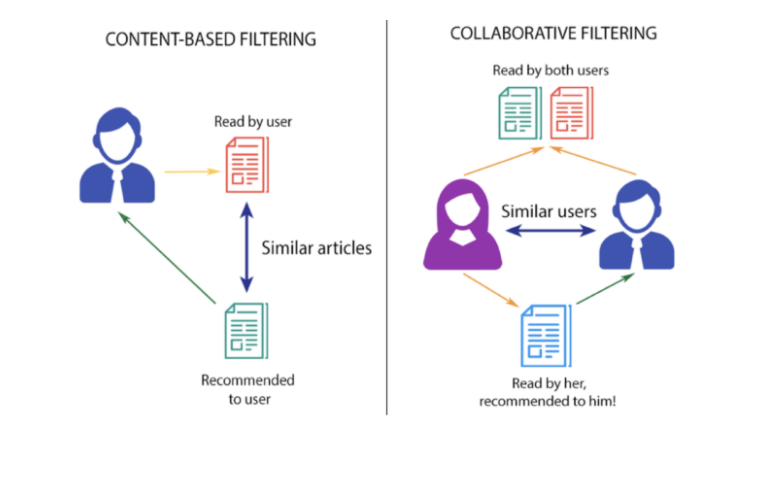

In [ ]:
df = pd.DataFrame(dataset['title'].value_counts())
df['total_ratings'] = df['title']
df['title'] = df.index
df.reset_index(level=0, inplace=True)
df = df.drop('index',axis=1)

df = dataset.merge(df, left_on = 'title', right_on = 'title', how = 'left')
df = df.drop(['year','publisher','age','City','State','Country'], axis=1)

popularity_threshold = 50
popular_book = df[df['total_ratings'] >= popularity_threshold]
popular_book = popular_book.reset_index(drop = True)

###**User - Item Collaborative Filtering**

Collaborative Filtering Recommendation System works by considering user ratings and finds cosine similarities in ratings by several users to recommend books. To implement this, we took only those books' data that have at least 50 ratings in all.

In [ ]:
testdf = pd.DataFrame()
testdf['ISBN'] = popular_book['ISBN']
testdf['rating'] = popular_book['rating']
testdf['user_id'] = popular_book['user_id']
testdf = testdf[['user_id','rating']].groupby(testdf['ISBN'])

In [ ]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics.pairwise import cosine_similarity

listOfDictionaries = []
indexMap = {}
reverseIndexMap = {}
ptr = 0

for groupKey in testdf.groups.keys():
    tempDict = {}
    groupDF = testdf.get_group(groupKey)
    for i in range(0, len(groupDF)):
        tempDict[groupDF.iloc[i, 0]] = groupDF.iloc[i, 1]
    indexMap[ptr] = groupKey
    reverseIndexMap[groupKey] = ptr
    ptr = ptr + 1
    listOfDictionaries.append(tempDict)

# Create a DictVectorizer and transform the list of dictionaries into a sparse matrix
dictVectorizer = DictVectorizer(sparse=True)
vector = dictVectorizer.fit_transform(listOfDictionaries)

# Compute pairwise cosine similarity
pairwiseSimilarity = cosine_similarity(vector)


In [ ]:
def printBookDetails(bookID):
    print(df[df['ISBN'] == bookID]['title'].values[0])

def getTopRecommandations(bookID, number=5):
    row = reverseIndexMap.get(bookID, -1)
    if row == -1:
        print("Book not found in the dataset.")
        return []

    print("Input Book:")
    printBookDetails(bookID)

    print("\nRECOMMENDATIONS:\n")

    similar_indices = np.argsort(pairwiseSimilarity[row])[::-1]

    collaborative = []
    for i in similar_indices:
        if i != row:
            book_title = df[df['ISBN'] == indexMap[i]]['title'].values[0]
            if book_title not in collaborative:
                collaborative.append(book_title)
                printBookDetails(indexMap[i])
                if len(collaborative) >= number:
                    break

    return collaborative


In [ ]:
k = list(df['title'])
m = list(df['ISBN'])

collaborative = getTopRecommandations(m[k.index('To Kill a Mockingbird')])

# Create a DataFrame with a specified column name
recommended_books = pd.DataFrame({'Recommended Books': collaborative})

# Print the DataFrame
print("\nRecommended Books:\n")
print(recommended_books)


###**3 Correlation Based**

For this model, we have created the correlation matrix considering only those books which have total ratings of more than 50. Then a user-book rating matrix is created. For the input book using the correlation matrix, top books are recommended.

In [ ]:
popularity_threshold = 50

# Filter users with ratings meeting the popularity threshold
user_count = dataset['user_id'].value_counts()
data = dataset[dataset['user_id'].isin(user_count[user_count >= popularity_threshold].index)]

# Filter books with ratings meeting the popularity threshold
rat_count = data['rating'].value_counts()
data = data[data['rating'].isin(rat_count[rat_count >= popularity_threshold].index)]

# Create the user-item rating matrix with pivot_table
matrix = data.pivot_table(index='user_id', columns='ISBN', values='rating', fill_value=0)


In [ ]:
average_rating = pd.DataFrame(dataset.groupby('ISBN')['rating'].mean())
average_rating['ratingCount'] = pd.DataFrame(new_ratings.groupby('ISBN')['rating'].count())
average_rating.sort_values('ratingCount', ascending=False).head()

In [ ]:
isbn = books.loc[books['title'] == 'Lord of the Flies'].reset_index(drop = True).iloc[0]['ISBN']
row = matrix[isbn]
correlation = pd.DataFrame(matrix.corrwith(row), columns = ['Pearson Corr'])
corr = correlation.join(average_rating['ratingCount'])

res = corr.sort_values('Pearson Corr', ascending=False).head(5+1)[1:].index
corr_books = pd.merge(pd.DataFrame(res, columns = ['ISBN']), books, on='ISBN')
print("\n Recommended Books: \n")
corr_books

###**4 Nearest Neighbours Based**

kNN(k-Nearest Neighbors) as an algorithm seems to be inspired from real life. The full k-nearest neighbors algorithm works much in the way some of us ask for recommendations from our friends. First, we start with people whose taste we feel we share, and then we ask a bunch of them to recommend something to us. If many of them recommend the same thing, we deduce that we’ll like it as well. Our behaviour is guided by the friends we grew up with.kNN is a machine learning algorithm to find clusters of similar users based on common book ratings, and make predictions using the average rating of top-k nearest neighbors.

Here we assume that users who given ratings more than 200 are users who read atleast 20 books(suppose on user given rating 10/10 so minimum he read books(200 ratings/10 ratings per book=20).For statisfical significance we should consider only the data of user who given more than 200 ratings.
To ensure statistical significance, users with less than 200 ratings, and books with less than 100 ratings are excluded.

In [ ]:
data = (dataset.groupby(by = ['title'])['rating'].count().reset_index().
        rename(columns = {'rating': 'total_rating'})[['title', 'total_rating']])

result = pd.merge(data, dataset, on='title', left_index = False)
result = result[result['total_rating'] >= popularity_threshold]
result = result.reset_index(drop = True)

matrix = result.pivot_table(index = 'title', columns = 'user_id', values = 'rating').fillna(0)
up_matrix = csr_matrix(matrix)

In [ ]:
bookName = 'Harry Potter and the Chamber of Secrets (Book 2)'
bookName = bookName.strip()  # Remove leading and trailing white spaces

In [ ]:
model = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model.fit(up_matrix)

distances, indices = model.kneighbors(matrix.loc[bookName].values.reshape(1, -1), n_neighbors = number+1)
print("\nRecommended books:\n")
for i in range(0, len(distances.flatten())):
    if i > 0:
        print(matrix.index[indices.flatten()[i]])

###**5.Content Based**

This system recommends books by calculating similarities in Book Titles. For this, TF-IDF feature vectors were created for unigrams and bigrams of Book-Titles; only those books' data has been considered which are having at least 80 ratings.

In [ ]:
#seting thershold as 80
popularity_threshold = 80
# sort the result based on thershgold value
popular_book = result[result['total_rating'] >= popularity_threshold]
popular_book = popular_book.reset_index(drop = True)
#print the shape of popular books
popular_book.shape

In [ ]:
#using TF vectorizer function
tf = TfidfVectorizer(ngram_range=(1, 2), min_df = 1, stop_words='english')
#fit the Tf vectoriser model
tfidf_matrix = tf.fit_transform(popular_book['title'])
tfidf_matrix.shape

In [ ]:
# normalising the df
normalized_df = tfidf_matrix.astype(np.float32)
#checking for cosine similarity
cosine_similarities = cosine_similarity(normalized_df, normalized_df)
#checking the shape
cosine_similarities.shape

In [ ]:
print("Recommended Books:\n")
isbn = books.loc[books['title'] == bookName].reset_index(drop = True).iloc[0]['ISBN']
content = []

idx = popular_book.index[popular_book['ISBN'] == isbn].tolist()[0]
similar_indices = cosine_similarities[idx].argsort()[::-1]
similar_items = []
for i in similar_indices:
    if popular_book['title'][i] != bookName and popular_book['title'][i] not in similar_items and len(similar_items) < number:
        similar_items.append(popular_book['title'][i])
        content.append(popular_book['title'][i])

for book in similar_items:
    print(book)

# **Conclusion**

In conclusion, this project aimed to create a book recommendation system using unsupervised learning techniques.

Recommender systems are algorithms aimed at suggesting relevant items to users. They are critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors.

The project involved exploring and analyzing the data, visualizing relationships between variables, and experimenting with different charts to gain insights. The data was pre-processed and cleaned to handle missing values and outliers. Several recommender systems were built, including popularity-based filtering, correlation-based recommendations, collaborative filtering using cosine similarity and k-nearest neighbors, and content based recommendations.

Important insights from EDA include:
- Top countries are USA and Canada.
- There are twice as many books published in 2002 than in 1989.
- The most rated book is Wild Animus with 2502 ratings.
- The top author is Agatha Christie for most number of books
- Top publisher is Harlequin.Most of books were published by Harlequin,Silhouette and pocket.
- The most frequently assigned rating by users is 8.


The different recommender systems built include:
- Popularity-based filtering
- Collaborative filtering using cosine similarity (User-Item)
- Recommendations based on correlation
- Collaborative filtering using k-nearest neighbors [kNN]
- Content Based

The project demonstrated the potential of these techniques to generate personalized book recommendations for users.